# Tarea 2 Redes Neuronales Artificiales
Andrea Figueroa

Alejandro Sazo

# Pregunta 3

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import SGD, Adadelta, Adagrad
from keras.models import load_model
from random import randint
np.set_printoptions(precision=5, suppress=True)

Using Theano backend.


## a)

Tamaño imágenes:  32 x 32
Número de clases: 10
Número de ejemplos de test: 26032
Número de ejemplos de entrenamiento: 73257
Set de Test:


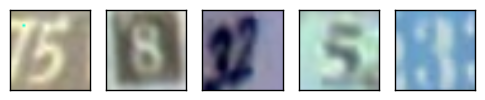

Set de Entrenamiento:


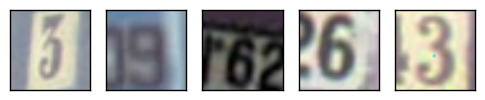

In [2]:
train_data = sio.loadmat('train_32x32.mat')
test_data = sio.loadmat('test_32x32.mat')

# Cargar set de entrenamiento
X_train = train_data['X'].T
y_train = train_data['y'] - 1

# Cargar set de test
X_test = test_data['X'].T
y_test = test_data['y'] - 1

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Número de clases
n_classes = len(np.unique(y_train))

# Número de ejemplos
n_train = len(X_train)
n_test = len(X_test)

print "Tamaño imágenes: " , np.shape(X_train[0])[1], "x", np.shape(X_train[0])[2]
print "Número de clases:" , n_classes
print "Número de ejemplos de test:" , n_test
print "Número de ejemplos de entrenamiento:" , n_train

# Número de imágenes a mostrar
n_im = 5

print "Set de Test:"

# Se eligen n elementos al azar
index = random.sample(X_test, n_im)

for i in range(0,len(index)):      
    ax = plt.subplot(1, n_im, 1+i)
    im = index[i].reshape(3,32,32).transpose(2,1,0)
    plt.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False) 
    
plt.show()
    
print "Set de Entrenamiento:"

# Se eligen n elementos al azar
index = random.sample(X_train, n_im)

for i in range(0,len(index)):      
    ax = plt.subplot(2, n_im, 1+i)
    im = index[i].reshape(3,32,32).transpose(2,1,0)
    plt.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False) 
        
plt.show()

## b)

In [3]:
# Normalizar imágenes
X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

## c)

In [4]:
(n_channels, n_rows, n_cols) = np.shape(X_train[0])

model = Sequential()
model.add(Convolution2D(16, 5, 5, border_mode='same', activation='relu',
            input_shape=(n_channels, n_rows, n_cols)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(512, 7, 7, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 16, 32, 32)    1216        convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 16, 16, 16)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 512, 16, 16)   401920      maxpooling2d_1[0][0]             
____________________________________________________________________________________________________
maxpooling2d_2 (MaxPooling2D)    (None, 512, 8, 8)     0           convolution2d_2[0][0]            
___________________________________________________________________________________________

## d)

```python

model.compile(loss='binary_crossentropy', optimizer="adagrad", metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=1280, nb_epoch=12, verbose=1, validation_data=(X_test, Y_test))

# Esto se hizo en el servidor con GPU

```

In [5]:
# Se carga el output obtenido para mostrarlo
text_file = open('output_3d', 'r')

output = text_file.read()

print output

Train on 73257 samples, validate on 26032 samples
Epoch 1/12
73257/73257 [==============================] - 35s - loss: 0.3927 - acc: 0.8977 - val_loss: 0.3161 - val_acc: 0.9000
Epoch 2/12
73257/73257 [==============================] - 36s - loss: 0.3165 - acc: 0.9000 - val_loss: 0.3148 - val_acc: 0.9000
Epoch 3/12
73257/73257 [==============================] - 36s - loss: 0.3109 - acc: 0.9004 - val_loss: 0.3073 - val_acc: 0.9011
Epoch 4/12
73257/73257 [==============================] - 36s - loss: 0.2787 - acc: 0.9069 - val_loss: 0.2569 - val_acc: 0.9097
Epoch 5/12
73257/73257 [==============================] - 36s - loss: 0.2136 - acc: 0.9237 - val_loss: 0.2107 - val_acc: 0.9225
Epoch 6/12
73257/73257 [==============================] - 36s - loss: 0.1704 - acc: 0.9375 - val_loss: 0.1641 - val_acc: 0.9406
Epoch 7/12
73257/73257 [==============================] - 36s - loss: 0.1460 - acc: 0.9469 - val_loss: 0.1519 - val_acc: 0.9457
Epoch 8/12
73257/73257 [==============================

## e)

In [6]:
def generate_model(cf_size, cp_size):
    model = Sequential()
    model.add(Convolution2D(16,cf_size,cf_size, border_mode='same',activation='relu',input_shape=(n_channels, n_rows, n_cols)))
    model.add(MaxPooling2D(pool_size=(cp_size,cp_size)))
    model.add(Convolution2D(512,cf_size,cf_size, border_mode='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(cp_size,cp_size)))
    model.add(Flatten())
    model.add(Dense(20, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))

    return model

# Tamaño capas convolucionales
cf_size = [3,5,7,9]
# Tamaño capas de pooling
cp_size = [2,4]

for i in cf_size:
    for j in cp_size:
        model = generate_model(i,j)
        print "Modelo con tamaño capa convolucional: ", i, " y tamaño capa de pooling: ", j
        model.summary()

Modelo con tamaño capa convolucional:  3  y tamaño capa de pooling:  2
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_3 (Convolution2D)  (None, 16, 32, 32)    448         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
maxpooling2d_3 (MaxPooling2D)    (None, 16, 16, 16)    0           convolution2d_3[0][0]            
____________________________________________________________________________________________________
convolution2d_4 (Convolution2D)  (None, 512, 16, 16)   74240       maxpooling2d_3[0][0]             
____________________________________________________________________________________________________
maxpooling2d_4 (MaxPooling2D)    (None, 512, 8, 8)     0           convolution2d_4[0][0]            
____________________

```python

# Tamaño capas convolucionales
cf_size = [3,5,7,9]
# Tamaño capas de pooling
cp_size = [2,4]

for i in cf_size:
    for j in cp_size:
        print "Modelo con tamaño capa convolucional: ", i, " y tamaño capa de pooling: ", j
        model = generate_model(i,j)
        model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])
        model.fit(X_train, Y_train, batch_size=1280, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

# Ejecutado en servidor con  GPU

```

In [7]:
# Se carga el output obtenido para mostrarlo
text_file = open('output_3e', 'r')

output = text_file.read()

print output

Modelo con tamanio capa convolucional:  3  y tamanio capa de pooling:  2
Train on 73257 samples, validate on 26032 samples
Epoch 1/10
73257/73257 [==============================] - 23s - loss: 0.3756 - acc: 0.8967 - val_loss: 0.3144 - val_acc: 0.9001
Epoch 2/10
73257/73257 [==============================] - 23s - loss: 0.2952 - acc: 0.9017 - val_loss: 0.2880 - val_acc: 0.9018
Epoch 3/10
73257/73257 [==============================] - 23s - loss: 0.2542 - acc: 0.9115 - val_loss: 0.2346 - val_acc: 0.9162
Epoch 4/10
73257/73257 [==============================] - 23s - loss: 0.2110 - acc: 0.9240 - val_loss: 0.2085 - val_acc: 0.9232
Epoch 5/10
73257/73257 [==============================] - 23s - loss: 0.1794 - acc: 0.9345 - val_loss: 0.1750 - val_acc: 0.9366
Epoch 6/10
73257/73257 [==============================] - 24s - loss: 0.1581 - acc: 0.9420 - val_loss: 0.1593 - val_acc: 0.9415
Epoch 7/10
73257/73257 [==============================] - 24s - loss: 0.1442 - acc: 0.9477 - val_loss: 0.1477

## f)

In [8]:
def generate_model_f(n_filters_l1, n_filters_l2):
    
    (n_channels, n_rows, n_cols) = np.shape(X_train[0])

    # Se eligen estos parámetros
    cf_size = 5
    cp_size = 2
    
    model = Sequential()
    model.add(Convolution2D(n_filters_l1,cf_size,cf_size,border_mode='same',activation='relu',
    input_shape=(n_channels, n_rows, n_cols)))
    model.add(MaxPooling2D(pool_size=(cp_size,cp_size)))
    model.add(Convolution2D(n_filters_l2,cf_size,cf_size,border_mode='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(cp_size,cp_size)))
    model.add(Flatten())
    model.add(Dense(20, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))

    return model

```python
# Valores a probar
n_filters_l1_array = [16,32,64,128]
n_filters_l2_array = [32,64,128,256]

for i in n_filters_l1_array:
    for j in n_filters_l2_array:
        print "Modelo con #filtros capa 1: ", i, " y #filtros capa 2: ", j
        model = generate_model_f(i,j)
        model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])
        model.fit(X_train, Y_train, batch_size=1280, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))
        
# Se corre en el servidor con GPU
```

In [9]:
# Se carga el output obtenido para mostrarlo
text_file = open('output_3f', 'r')

output = text_file.read()

print output

Modelo con \#filtros capa 1:  16  y \#filtros capa 2:  32
Train on 73257 samples, validate on 26032 samples
Epoch 1/10
73257/73257 [==============================] - 17s - loss: 0.3234 - acc: 0.8989 - val_loss: 0.3134 - val_acc: 0.9010
Epoch 2/10
73257/73257 [==============================] - 18s - loss: 0.2960 - acc: 0.9025 - val_loss: 0.2781 - val_acc: 0.9048
Epoch 3/10
73257/73257 [==============================] - 17s - loss: 0.2599 - acc: 0.9100 - val_loss: 0.2357 - val_acc: 0.9164
Epoch 4/10
73257/73257 [==============================] - 18s - loss: 0.2188 - acc: 0.9208 - val_loss: 0.1991 - val_acc: 0.9252
Epoch 5/10
73257/73257 [==============================] - 17s - loss: 0.1853 - acc: 0.9326 - val_loss: 0.1712 - val_acc: 0.9380
Epoch 6/10
73257/73257 [==============================] - 17s - loss: 0.1617 - acc: 0.9417 - val_loss: 0.1602 - val_acc: 0.9413
Epoch 7/10
73257/73257 [==============================] - 17s - loss: 0.1454 - acc: 0.9480 - val_loss: 0.1492 - val_acc: 0.9

## g) 

In [10]:
#Cambio de arquitectura, 2 capas convolucionales seguidas de ua capa de pooling

model = Sequential()
model.add(Convolution2D(32, 3, 3,border_mode='same',activation='relu',input_shape=(3,32,32)))
model.add(Convolution2D(32, 3, 3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

```python
model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=1280, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))
# Se corre en el servidor con GPU
```

In [11]:
# Se carga el output obtenido para mostrarlo
text_file = open('output_3g', 'r')

output = text_file.read()

print output

Train on 73257 samples, validate on 26032 samples
Epoch 1/10
73257/73257 [==============================] - 74s - loss: 0.3387 - acc: 0.8989 - val_loss: 0.3180 - val_acc: 0.9000
Epoch 2/10
73257/73257 [==============================] - 75s - loss: 0.3179 - acc: 0.8995 - val_loss: 0.3157 - val_acc: 0.9000
Epoch 3/10
73257/73257 [==============================] - 75s - loss: 0.3023 - acc: 0.9019 - val_loss: 0.2910 - val_acc: 0.9035
Epoch 4/10
73257/73257 [==============================] - 75s - loss: 0.2912 - acc: 0.9041 - val_loss: 0.2812 - val_acc: 0.9071
Epoch 5/10
73257/73257 [==============================] - 75s - loss: 0.2791 - acc: 0.9081 - val_loss: 0.2670 - val_acc: 0.9108
Epoch 6/10
73257/73257 [==============================] - 75s - loss: 0.2633 - acc: 0.9133 - val_loss: 0.2570 - val_acc: 0.9142
Epoch 7/10
73257/73257 [==============================] - 75s - loss: 0.2580 - acc: 0.9141 - val_loss: 0.2472 - val_acc: 0.9164
Epoch 8/10
73257/73257 [==============================

## h)

In [12]:
import theano
# Modelo sugerido en e
#np.random.seed(1337) # for reproducibility

model = Sequential()

model.add(Convolution2D(16, 5, 5, border_mode='same', input_shape=(n_channels, n_rows, n_cols)))
convout1 = Activation('relu')
model.add(convout1)

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(512, 7, 7, border_mode='same'))
convout2 = Activation('relu')
model.add(convout2)

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [ ]:
#model.compile(loss='binary_crossentropy', optimizer="adagrad", metrics=['accuracy'])
#model.fit(X_train, Y_train, batch_size=1280, nb_epoch=12, verbose=1, validation_data=(X_test, Y_test))
#model.save('model_h.h5')
# Se corre en máquina con GPU

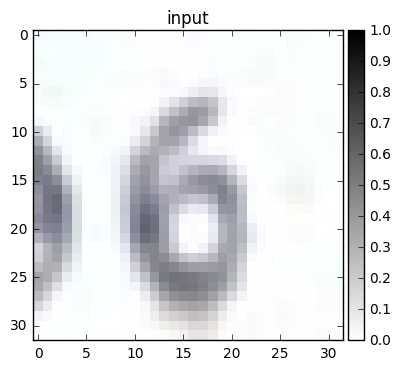

In [13]:
from keras import backend as K
import pylab as pl
import matplotlib.cm as cm

inputs = [K.learning_phase()] + model.inputs

_convout1_f = K.function(inputs, [convout1.output])
def convout1_f(X):
    # The [0] is to disable the training phase flag
    return _convout1_f([0] + [X])

# utility functions
from mpl_toolkits.axes_grid1 import make_axes_locatable

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    pl.colorbar(im, cax=cax)
    
i = 130

# Visualize the first layer of convolutions on an input image
X = X_test[i:i+1]

pl.figure()
pl.title('input')
nice_imshow(pl.gca(), np.squeeze(X.reshape(3,32,32).transpose(2,1,0)), vmin=0, vmax=1, cmap=cm.binary)

plt.show()

In [14]:
import numpy.ma as ma
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in xrange(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic

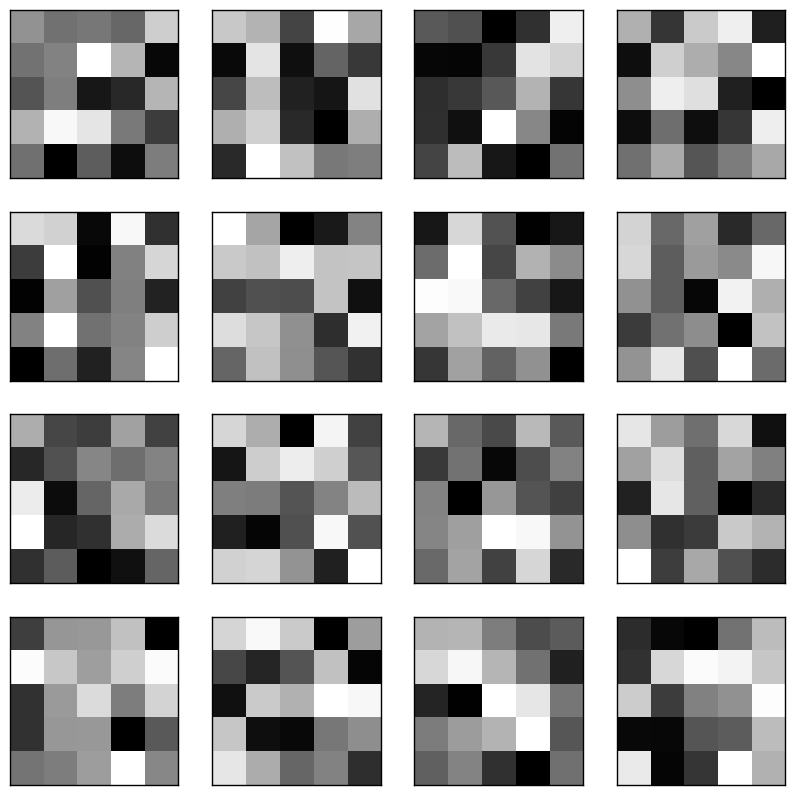

In [39]:
def visualize_weights(W):
    plt.figure(figsize=(10, 10))

    for ind, val in enumerate(W):
        ax = plt.subplot(4, 4, ind+1)
        #print val.shape[:2]
        #im = val.reshape((5,5))
        plt.imshow(val, cmap=cm.binary, interpolation='nearest')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False) 

    plt.show()
    
W = model.layers[0].get_weights()[0]
#W = model.layers[0].W.get_value(borrow=True)
W = np.squeeze(W)
W = W[:,0,:,:]
visualize_weights(W)

('C1 shape : ', (16, 32, 32))


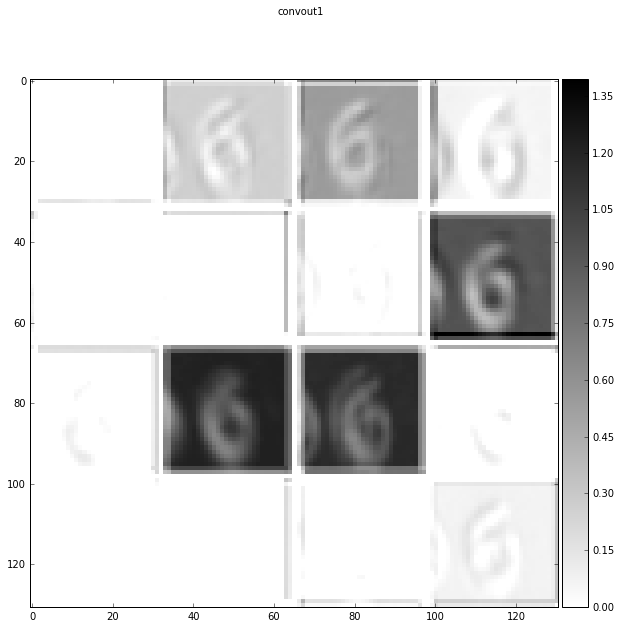

In [16]:
# Visualize convolution result (after activation)

# Visualize the first layer of convolutions on an input image
X = X_test[i:i+1]

C1 = convout1_f(X)
C1 = np.squeeze(C1).transpose(0,2,1)
print("C1 shape : ", C1.shape)

pl.figure(figsize=(10, 10))
pl.suptitle('convout1')
nice_imshow(pl.gca(), make_mosaic(C1, 4, 4), cmap=cm.binary)
plt.show()

## i)

In [17]:
# Modelo utilizando Dropout
model = Sequential()
model.add(Convolution2D(32, 3, 3,border_mode='same',activation='relu',input_shape=(3,32,32)))
model.add(Convolution2D(32, 3, 3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

```python
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
batch_size = 1280
n_epoch = 20
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=n_epoch, verbose=1, validation_data=(X_test, Y_test))
# Se corre en el servidor con GPU
```

In [18]:
# Se carga el output obtenido para mostrarlo
text_file = open('output_3i', 'r')

output = text_file.read()

print output

Train on 73257 samples, validate on 26032 samples
Epoch 1/20
73257/73257 [==============================] - 74s - loss: 0.3191 - acc: 0.9000 - val_loss: 0.3166 - val_acc: 0.9000
Epoch 2/20
73257/73257 [==============================] - 75s - loss: 0.3175 - acc: 0.9000 - val_loss: 0.3158 - val_acc: 0.9000
Epoch 3/20
73257/73257 [==============================] - 75s - loss: 0.3166 - acc: 0.9000 - val_loss: 0.3142 - val_acc: 0.9000
Epoch 4/20
73257/73257 [==============================] - 75s - loss: 0.3139 - acc: 0.9003 - val_loss: 0.3099 - val_acc: 0.9008
Epoch 5/20
73257/73257 [==============================] - 75s - loss: 0.3019 - acc: 0.9029 - val_loss: 0.2837 - val_acc: 0.9055
Epoch 6/20
73257/73257 [==============================] - 75s - loss: 0.2562 - acc: 0.9145 - val_loss: 0.2140 - val_acc: 0.9235
Epoch 7/20
73257/73257 [==============================] - 75s - loss: 0.2021 - acc: 0.9296 - val_loss: 0.2549 - val_acc: 0.9081
Epoch 8/20
73257/73257 [==============================

## j)

In [19]:
train_data = sio.loadmat('train_32x32.mat')
# Cargar set de entrenamiento
X_train = train_data['X'].T
y_train = train_data['y'] - 1

X_train = X_train.astype('float32')

(n_channels, n_rows, n_cols) = np.shape(X_train[0])

model = Sequential()
model.add(Convolution2D(16, 5, 5, border_mode='same', activation='relu',
            input_shape=(n_channels, n_rows, n_cols)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(512, 7, 7, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

```python
model.compile(loss='binary_crossentropy', optimizer="adagrad", metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=1280, nb_epoch=12, verbose=1, validation_data=(X_test, Y_test))
# Correr en pc con GPU y harta memoria
```